Построю модель регрессии для предсказания курса японской йены на 7 дней вперед.
Для этого возьму данные курса японской йены с сайта сбербанка за 5 лет.

In [ ]:
#Подгружаю библиотеки
import pandas as pd #Библиотека Для работы с 2D таблицами
from google.colab import files #Библиотека для работы с файлами
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
files.upload() #Загружаю файл с таблицей курса японской йены за 5 лет

In [ ]:
rates = pd.read_excel('RC_F01_01_2015_T16_06_2020.xlsx') #Чтение Excel таблицы

In [ ]:
rates

,nominal,data,curs,cdx
0,100,2015-01-01,46.9998,Японская иена
1,100,2015-01-13,52.8550,Японская иена
2,100,2015-01-14,54.7587,Японская иена
3,100,2015-01-15,56.5934,Японская иена
4,100,2015-01-16,55.1073,Японская иена
...,...,...,...,...
1332,100,2020-06-09,62.3657,Японская иена
1333,100,2020-06-10,63.6199,Японская иена
1334,100,2020-06-11,63.9529,Японская иена
1335,100,2020-06-12,64.6090,Японская иена


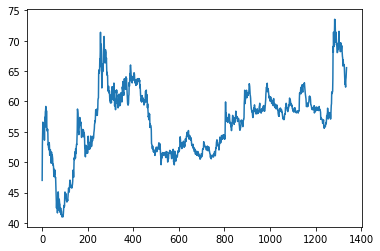

In [ ]:
rates.curs.plot() #График курса японской йены за 5 лет
plt.show()

Поставнока задачи: спрогнозировать курс йены на 7 дней вперед. <br>
Разобью датасет курса йены за 5 лет на куски по 28 дней для входных данных и на 7 последующих дней для обучения предсказания модели.

In [ ]:
rates.curs[100:128] #Пример обучающих данных 28 дней

100    45.0854
101    44.6793
102    44.9329
103    44.5906
104    44.1526
105    44.7513
106    43.7454
107    43.5572
108    43.4567
109    43.6853
110    43.5051
111    43.8240
112    43.6455
113    44.1144
114    44.4276
115    45.2021
116    45.7228
117    45.2179
118    45.0488
119    45.1797
120    46.0255
121    46.5973
122    47.0422
123    46.9553
124    46.3963
125    45.8642
126    46.2085
127    45.8356
Name: curs, dtype: float64

In [ ]:
rates.curs[128:135] #Пример курса японской йены на 7 дней вперед

128    45.9611
129    45.8424
130    45.7284
131    45.8385
132    46.0756
133    46.3329
134    46.8044
Name: curs, dtype: float64

In [ ]:
 past = 28 #28 примеров курс валют прошлых 28 дней
 future = 7 #7 примеров того что модель должна предсказать

In [ ]:
start = past #начнем обучение с 28 дня
end = len(rates.curs) - future # Заканчиваем рассмотрение данных на 7 дне с конца

Соберу лист с данными для обучающией выборки (куски данных по 28 дням и куски с данными по 7 дням)

In [ ]:
dataframe = []
for day in range(start, end):
  past_data = list(rates.curs[(day-past):day]) #Куски 28 дней в прошлом
  future_data = list(rates.curs[day:(day + future)]) #Куски 7 дней в будущем
  dataframe.append(past_data + future_data) #Оба куска складываю в 1 лист "dataframe"  

In [ ]:
dataframe[0] #28 значений в прошлом + 7 значений для будущего предсказания

[46.9998,
 52.855,
 54.7587,
 56.5934,
 55.1073,
 55.8928,
 55.4332,
 54.9636,
 55.7092,
 55.4472,
 53.6274,
 55.4844,
 57.3928,
 56.9218,
 58.3078,
 58.4888,
 59.1802,
 57.8117,
 55.7494,
 58.4672,
 56.3028,
 55.4208,
 55.1155,
 55.1568,
 55.4409,
 54.7104,
 52.838,
 52.9898,
 52.3732,
 52.3823,
 52.0193,
 53.2274,
 52.6746,
 51.1314,
 51.3487]

In [ ]:
#Создание колонок для 28 дней обучающих данных "учебника" для формирования датасета
past_columns = []
for i in range(past):
  past_columns.append(f'past_{i}')
past_columns

In [ ]:
#Создание колонок для 7 дней обучающей выборки "ответы учебника" для формирования датасета
future_columns = []
for i in range(future):
  future_columns.append(f'future_{i}')
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [ ]:
jpy = pd.DataFrame(dataframe, columns=past_columns + future_columns) #Сбор датасета 

In [ ]:
jpy.head #Как выглядит собранный датасет

<bound method NDFrame.head of        past_0   past_1   past_2  ...  future_4  future_5  future_6
0     46.9998  52.8550  54.7587  ...   52.6746   51.1314   51.3487
1     52.8550  54.7587  56.5934  ...   51.1314   51.3487   51.8972
2     54.7587  56.5934  55.1073  ...   51.3487   51.8972   52.0706
3     56.5934  55.1073  55.8928  ...   51.8972   52.0706   51.6676
4     55.1073  55.8928  55.4332  ...   52.0706   51.6676   51.6134
...       ...      ...      ...  ...       ...       ...       ...
1297  68.1430  68.6642  69.3285  ...   62.8397   63.2325   62.7951
1298  68.6642  69.3285  68.5588  ...   63.2325   62.7951   62.3657
1299  69.3285  68.5588  69.2889  ...   62.7951   62.3657   63.6199
1300  68.5588  69.2889  71.0186  ...   62.3657   63.6199   63.9529
1301  69.2889  71.0186  71.5568  ...   63.6199   63.9529   64.6090

[1302 rows x 35 columns]>

In [ ]:
x = jpy[past_columns] #Входные данные

In [ ]:
y = jpy[future_columns] #Выходные данные

In [ ]:
#Тренировочная выборка, это та, на которой мы тренируем модель, "Учебник"
x_train = x[:-10] # Задачи учебника
y_train = y[:-10] # Ответы на задачи учебника

In [ ]:
#Проверочная выборка, это та на которой мы проверим качество обучения модели "Экзамен"
x_test = x[-10:] # Задачи экзамена
y_test = y[-10:] # Ответы на задачи экзамена

In [ ]:
from sklearn.linear_model import LinearRegression #Для обучения возьму модель LinearRegression из библиотеки "sklearn"

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x_train, y_train) #Обучение модели LinearRegression на выходных и выходных данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test.head(1)

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,past_10,past_11,past_12,past_13,past_14,past_15,past_16,past_17,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
1292,69.3106,69.6391,68.5047,68.0459,68.0877,68.143,68.6642,69.3285,68.5588,69.2889,71.0186,71.5568,69.8063,69.4035,69.4763,69.6629,69.2147,68.198,69.5323,69.6587,69.4813,68.3126,68.7585,69.1935,68.3813,68.0464,67.4196,67.1694


In [ ]:
firstDay = x_test.head(1) #Тестовые данные для предсказания модели в определенный день

In [ ]:
firstDayReal = y_test.head(1) #Реальные значения в определенный день

In [ ]:
prediction = linreg.predict(firstDay) #Данные предсказания мождели 

In [ ]:
prediction #Данные которые предсказала модель

array([[66.94089812, 66.84511025, 66.95791925, 66.85572977, 66.67417993,
        66.51954322, 66.4352194 ]])

In [ ]:
firstDayReal #Реальные данные 

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
1292,65.838,66.8748,66.4528,65.9872,66.0841,65.9413,65.9539


In [ ]:
from sklearn.metrics import mean_absolute_error #Метрика для определения абсолютной ошибки предсказания

In [ ]:
mean_absolute_error(prediction[0], firstDayReal.iloc[0]) #Абсолютная ошибка модели в копейках

0.5936970623515399

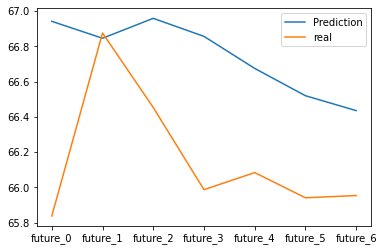

In [ ]:
#График предсказания модели и реальных значений за тот же день
plt.plot(prediction[0], label = 'Prediction')
plt.plot(firstDayReal.iloc[0], label = 'real')
plt.legend()
plt.show()

MAE = 0.5107929403069623


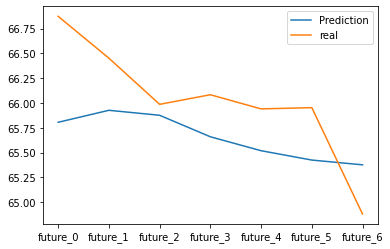

In [ ]:
prediction = linreg.predict([x_test.iloc[1]])
real = y_test.iloc[1]
mae = mean_absolute_error(prediction[0], real)
print(f'MAE = {mae}')
plt.plot(prediction[0], label = 'Prediction')
plt.plot(real, label = 'real')
plt.legend()
plt.show()

In [ ]:
#Загрузка модели KNeighborsRegressor из sklearn
from sklearn.neighbors import KNeighborsRegressor 


In [ ]:
#Обучение модели KNeighborsRegressor as knn
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

MAE = 0.4159499999999972


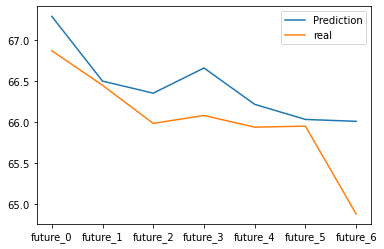

In [ ]:
#График предсказания и реальных значениях + абсолютная ошибка между ними
prediction = knn.predict([x_test.iloc[1]])
real = y_test.iloc[1]
mae = mean_absolute_error(prediction[0], real)
print(f'MAE = {mae}')
plt.plot(prediction[0], label = 'Prediction')
plt.plot(real, label = 'real')
plt.legend()
plt.show()

In [ ]:
#Загрузка модели НС для глубокого обучения MLPRegressor из библиотеки sklearn
from sklearn.neural_network import MLPRegressor

In [ ]:
#Задание параметров для модели, max_iter - сколько итерация обучения проводить
#Сколько использовать скрытых слоев hidden_layer_sizes (глубина обучения НС)
mlp = MLPRegressor(max_iter=1000, hidden_layer_sizes=(300,300,300))
mlp.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 300, 300), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

MAE = 1.5884998311614769


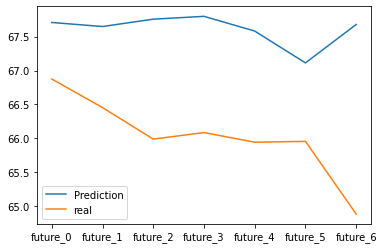

In [ ]:
prediction = mlp.predict([x_test.iloc[1]])
real = y_test.iloc[1]
mae = mean_absolute_error(prediction[0], real)
print(f'MAE = {mae}')
plt.plot(prediction[0], label = 'Prediction')
plt.plot(real, label = 'real')
plt.legend()

Вывод: Модель MLPRegressor предсказала хуже, чем KNeighborsRegressor и LinearRegression, необходимо подбирать параметры НС. Создадим сетку параметров для НС при помощи модуля GridSearchCV

In [ ]:
# GridSearchCV
# Поиск по сетке параметров
max_iter: 100, 500, 1000, 3000 #Кол-во итераций
hidden_layer_sizes: (100,), (50, 50, 50), (200, 200,) #Скрытые слои
# CV - cross validation - обучение модели с разными стартовыми значениями

In [ ]:
#Загрузка GridSearchCV из библиотеки sklearn
from sklearn.model_selection import GridSearchCV 

In [ ]:
#Задаю статичный выбор данных для обучения модели, чтобы нивелировать вероятность лучших стартовых данных для обучения
mlp = MLPRegressor(random_state = 42)

In [ ]:
#Настройка сетки параметров для перебора
grid = {
    'max_iter': [100, 250, 500, 1000],
    'hidden_layer_sizes': [(100,), (50, 50, 50), (200, 200,)],
    'activation': ['tanh', 'relu'],
}

In [ ]:
#Настройка GridSearchCV
#mlp - модель, которая будет использоваться в GridSearchCV
#grid - сетка параметров в виде dict - словаря
#cv - кросс валидация, сколько раз будет начинаться обучение с разных стартовых позиций
#n_jobs - сколько ядер будет использоваться для параллельных вычислений (значение -1 значит все доступные ядра)
gs = GridSearchCV(
    mlp, grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1
    )

In [ ]:
#Перебор параметров в GridSearchCV и обучение на входных и выходных данных
gs.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=42, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['

In [ ]:
#Лучший результат
gs.best_score_

-1.1321154880437618

In [ ]:
#Лучшие параметры из предоставленной сетки парметров
gs.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 250}

In [ ]:
#Лучшие настройки
gs.best_estimator_

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=250,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)